In [1]:
import pandas as pd
import scipy.stats as stats
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns; sns.set()


In [77]:
net_movie = pd.read_csv("Resources/NetflixDF4.csv")
net_movie.head(500)

,show_id,title,release_year,type,rating,country,genre,duration
0,s1,Dick Johnson Is Dead,2020,Movie,PG-13,United States,Documentaries,90.0
1,s8,Sankofa,1993,Movie,R,United States,Dramas,125.0
2,s10,The Starling,2021,Movie,PG-13,United States,Comedies,104.0
3,s25,Jeans,1998,Movie,PG-13,India,Comedies,166.0
4,s28,Grown Ups,2010,Movie,PG-13,United States,Comedies,103.0
...,...,...,...,...,...,...,...,...
495,s1518,Ma Rainey's Black Bottom,2020,Movie,R,United States,Dramas,94.0
496,s1537,Incarnate,2016,Movie,PG-13,United States,Horror Movies,87.0
497,s1538,Lee Daniels' The Butler,2013,Movie,PG-13,United States,Dramas,132.0
498,s1541,Nocturnal Animals,2016,Movie,R,United States,Dramas,117.0


In [3]:
net_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3558 entries, 0 to 3557
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       3558 non-null   object 
 1   title         3558 non-null   object 
 2   release_year  3558 non-null   int64  
 3   type          3558 non-null   object 
 4   rating        3558 non-null   object 
 5   country       3558 non-null   object 
 6   genre         3558 non-null   object 
 7   duration      3558 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 222.5+ KB


In [4]:
net_movie.genre.value_counts()

Dramas                      924
Comedies                    678
Documentaries               515
Action & Adventure          503
Children & Family Movies    327
Stand-Up Comedy             231
Horror Movies               170
Thrillers                    56
Classic Movies               55
International Movies         42
Independent Movies           18
Music & Musicals             14
Cult Movies                  11
Sci-Fi & Fantasy             10
Romantic Movies               2
Anime Features                1
Sports Movies                 1
Name: genre, dtype: int64

In [5]:
#locate top genres
#df2 = df.loc[(df['genre'] == 'Dramas') | (df['genre'] == 'Comedies' ) | (df['genre'] == 'Documentaries') | (df['genre'] == 'Action & Adventure')| (df['genre'] == 'Children & Family Movies')| (df['genre'] == 'Stand-Up Comedy')]
#df2.head()

In [6]:
top_genre = net_movie.loc[(net_movie["genre"] == 'Dramas') | (net_movie['genre'] == 'Comedies' ) | (net_movie['genre'] == 'Action & Adventure') | (net_movie['genre'] == 'Children & Family Movies') | (net_movie['genre'] == 'Stand-Up Comedy') | (net_movie["genre"] == 'Horror Movies') | (net_movie["genre"] == 'Thrillers')]

top_genre

,show_id,title,release_year,type,rating,country,genre,duration
1,s8,Sankofa,1993,Movie,R,United States,Dramas,125.0
2,s10,The Starling,2021,Movie,PG-13,United States,Comedies,104.0
3,s25,Jeans,1998,Movie,PG-13,India,Comedies,166.0
4,s28,Grown Ups,2010,Movie,PG-13,United States,Comedies,103.0
5,s29,Dark Skies,2013,Movie,PG-13,United States,Horror Movies,97.0
...,...,...,...,...,...,...,...,...
3552,s8799,Zed Plus,2014,Movie,R,India,Comedies,131.0
3553,s8800,Zenda,2009,Movie,PG-13,India,Dramas,120.0
3555,s8805,Zombieland,2009,Movie,R,United States,Comedies,88.0
3556,s8806,Zoom,2006,Movie,PG,United States,Children & Family Movies,88.0


In [7]:
top_genre.genre.value_counts()

Dramas                      924
Comedies                    678
Action & Adventure          503
Children & Family Movies    327
Stand-Up Comedy             231
Horror Movies               170
Thrillers                    56
Name: genre, dtype: int64

In [8]:
genre_movies = top_genre.genre.value_counts().reset_index()
genre_movies.columns = ["genre", "counts"]
genre_movies

,genre,counts
0,Dramas,924
1,Comedies,678
2,Action & Adventure,503
3,Children & Family Movies,327
4,Stand-Up Comedy,231
5,Horror Movies,170
6,Thrillers,56


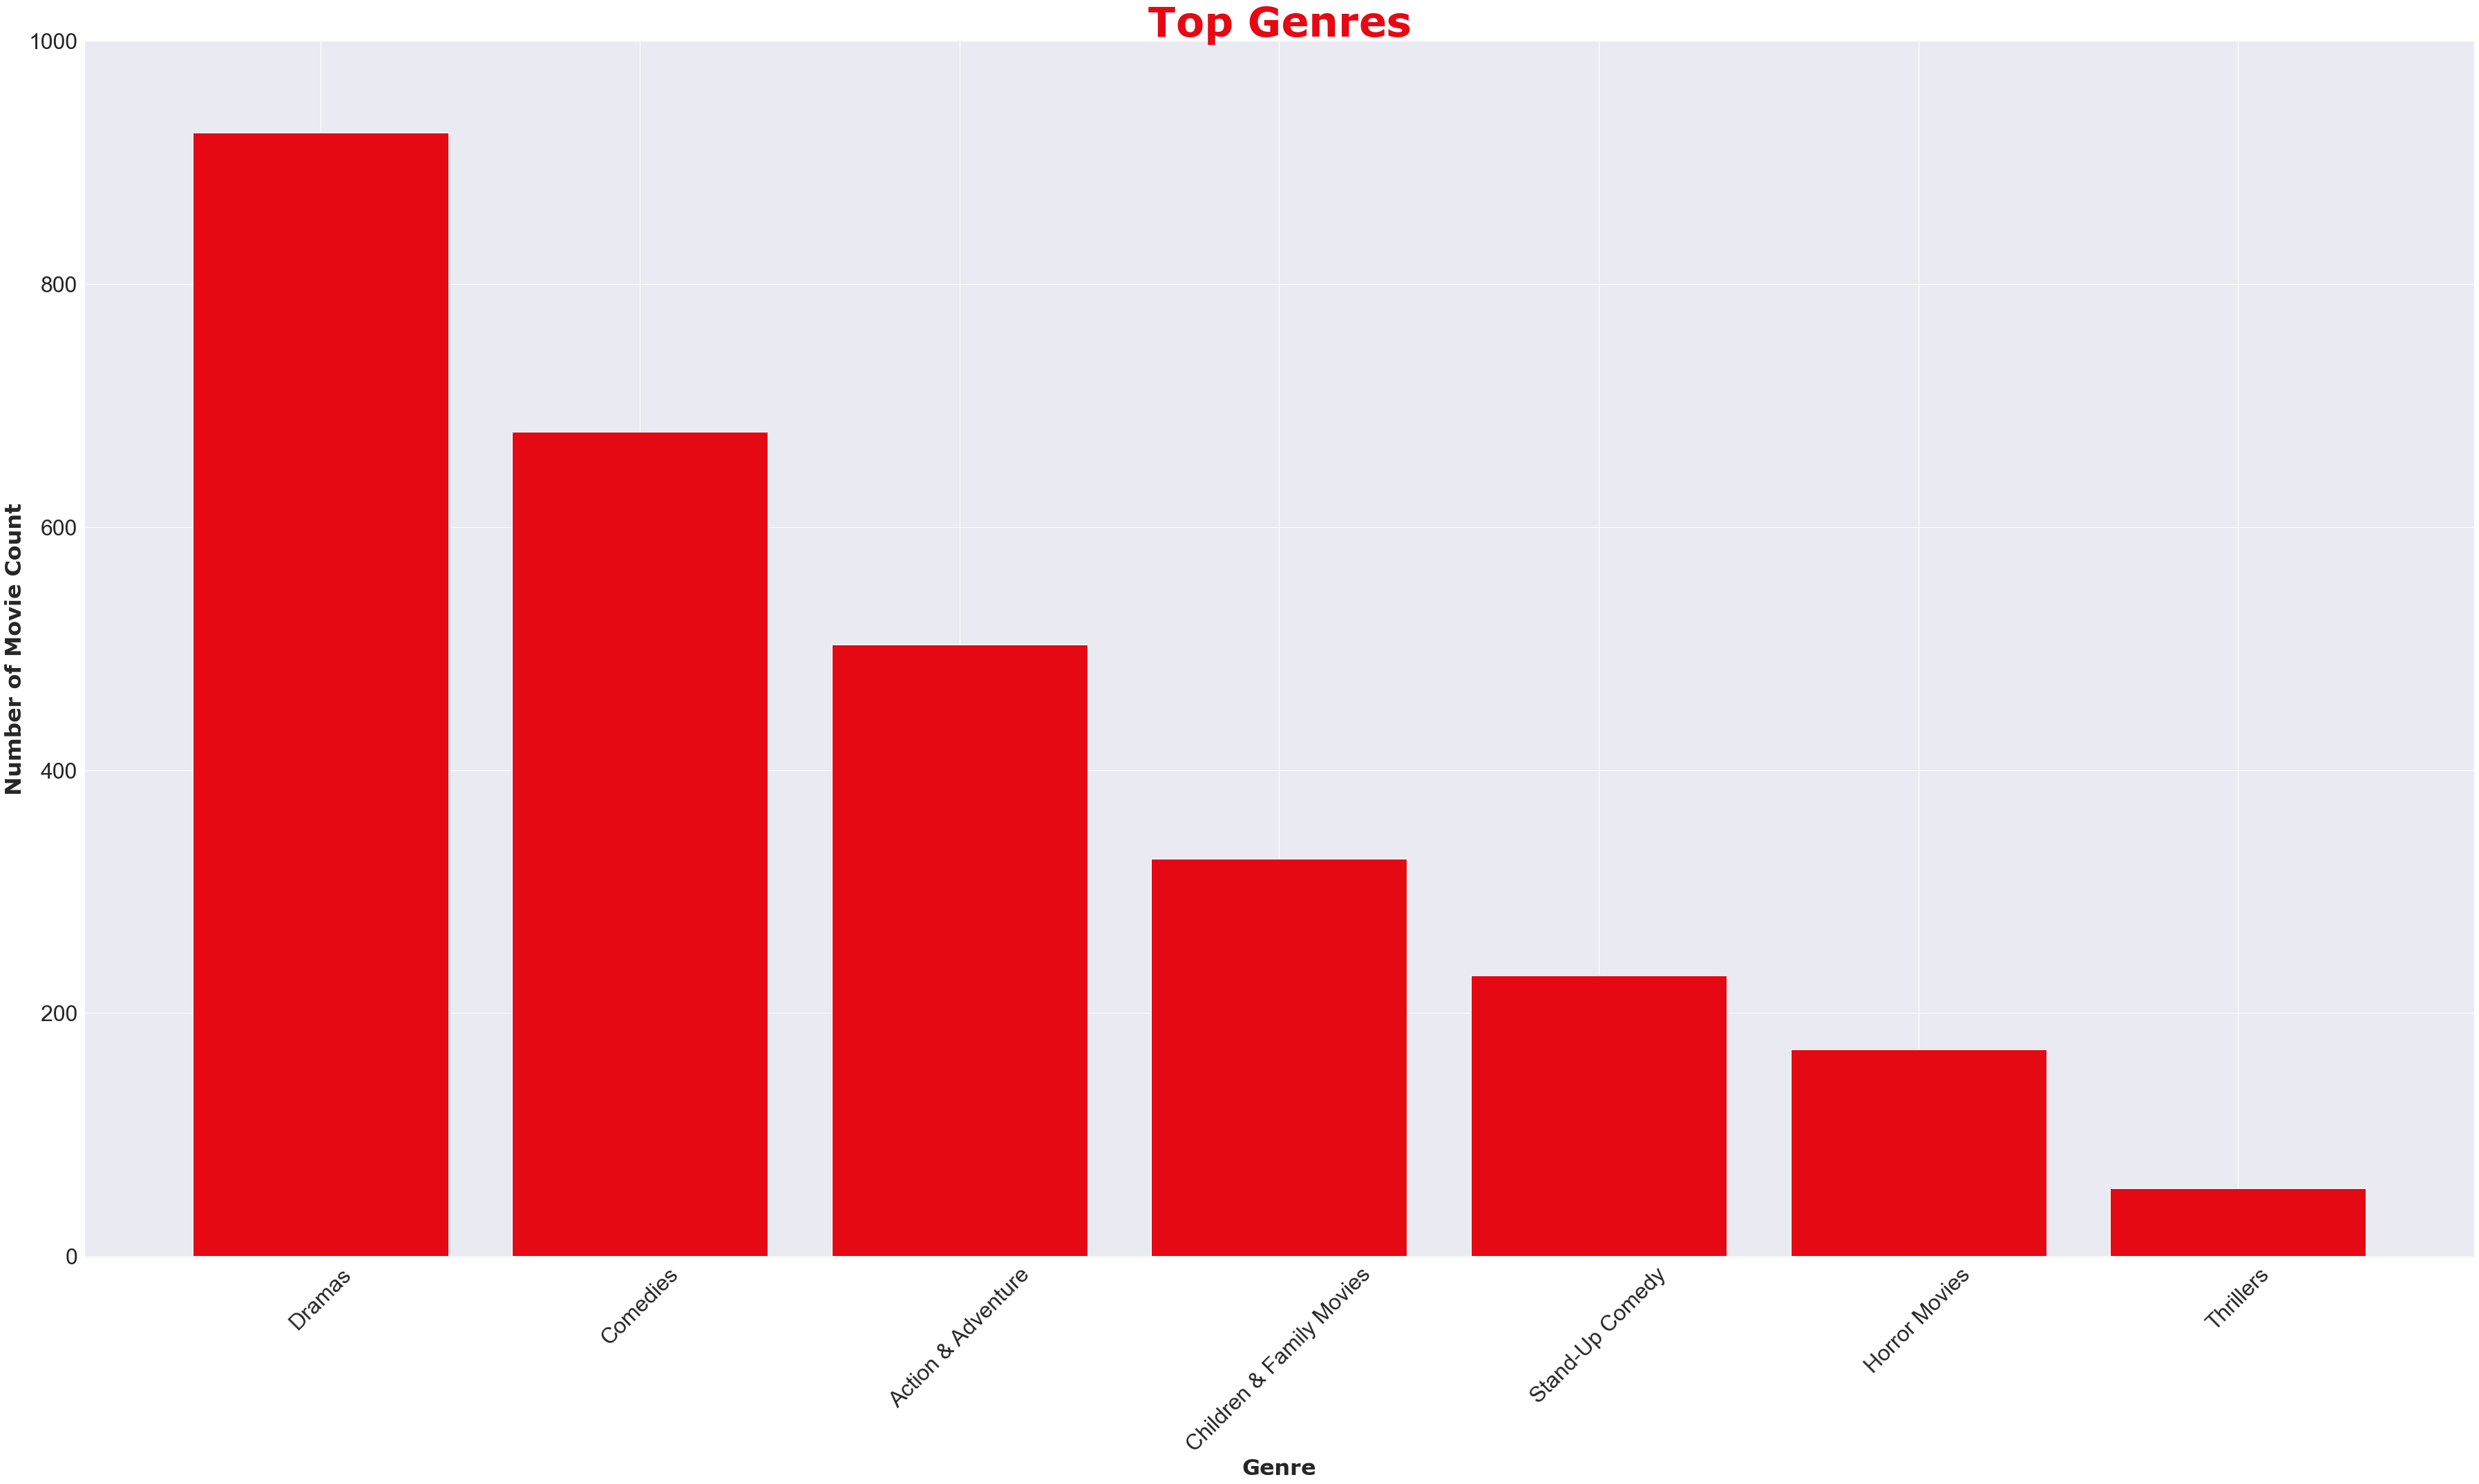

In [9]:
plt.figure(figsize=(50,30))
plt.bar(genre_movies.genre, genre_movies.counts, color="#E50914")
plt.ylim(-1, 1000)
plt.xticks(fontsize = 32, rotation = 45)
plt.yticks(fontsize = 32)
plt.xlabel("Genre",fontsize = 32,fontweight = "bold",fontname="Verdana")
plt.ylabel("Number of Movie Count",fontsize = 32,fontweight = "bold",fontname="Verdana")
plt.title("Top Genres", fontsize = 60, fontweight = "bold",fontname="Verdana", color = "#E50914")
plt.tight_layout()
plt.savefig("Top Genre Count.png")
plt.show()

#United States

In [38]:
us_df = top_genre.loc[(top_genre["country"] == 'United States')]
us_df.head(20)

,show_id,title,release_year,type,rating,country,genre,duration
1,s8,Sankofa,1993,Movie,R,United States,Dramas,125.0
2,s10,The Starling,2021,Movie,PG-13,United States,Comedies,104.0
4,s28,Grown Ups,2010,Movie,PG-13,United States,Comedies,103.0
5,s29,Dark Skies,2013,Movie,PG-13,United States,Horror Movies,97.0
6,s30,Paranoia,2013,Movie,PG-13,United States,Thrillers,106.0
7,s42,Jaws,1975,Movie,PG,United States,Action & Adventure,124.0
8,s43,Jaws 2,1978,Movie,PG,United States,Dramas,116.0
9,s44,Jaws 3,1983,Movie,PG,United States,Action & Adventure,98.0
10,s45,Jaws: The Revenge,1987,Movie,PG-13,United States,Action & Adventure,91.0
11,s49,Training Day,2001,Movie,R,United States,Dramas,122.0


In [40]:
us_df2 = us_df.genre.value_counts().reset_index()
us_df2.columns = ["genre", "counts"]
us_df2

,genre,counts
0,Dramas,424
1,Comedies,372
2,Action & Adventure,321
3,Children & Family Movies,289
4,Stand-Up Comedy,208
5,Horror Movies,122
6,Thrillers,50


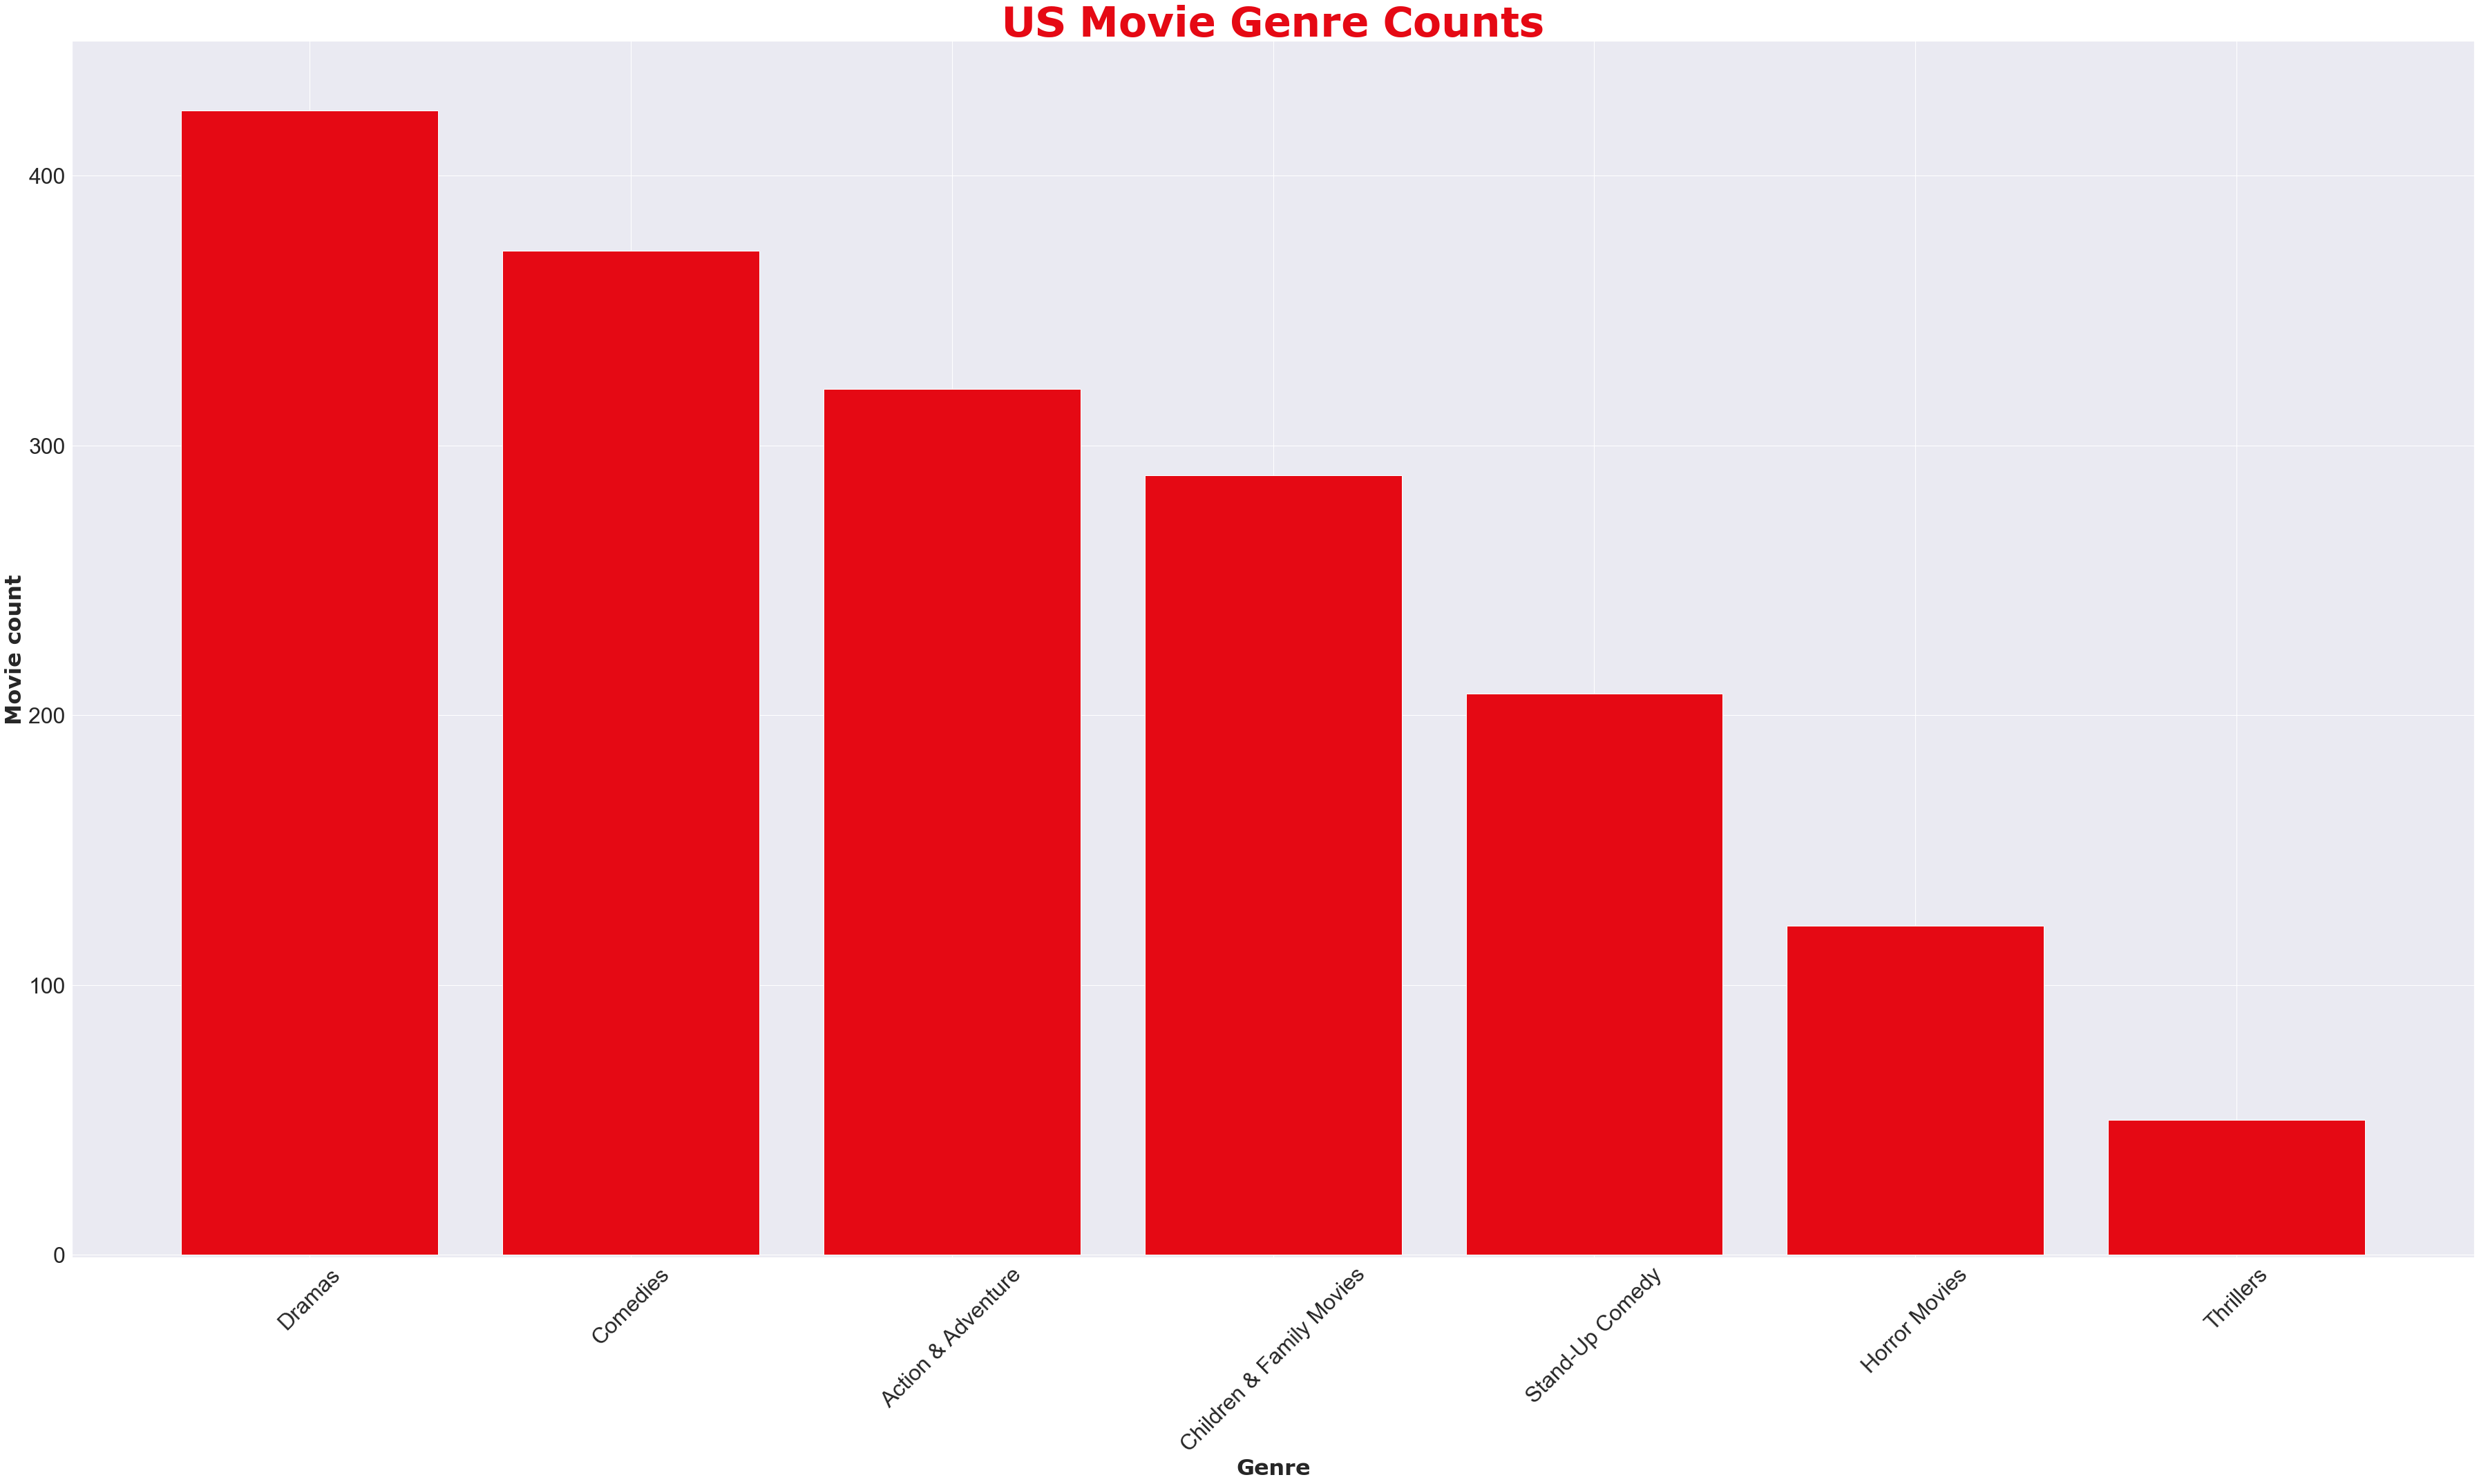

In [41]:
plt.figure(figsize=(50,30))
plt.bar(us_df2.genre, us_df2.counts, color="#E50914")
plt.ylim(-1, 450)
plt.xticks(fontsize = 32, rotation = 45)
plt.yticks(fontsize = 32)
plt.xlabel("Genre",fontsize = 32,fontweight = "bold",fontname="Verdana")
plt.ylabel("Movie count",fontsize = 32,fontweight = "bold",fontname="Verdana")
plt.title("US Movie Genre Counts", fontsize = 60, fontweight = "bold",fontname="Verdana", color = "#E50914")
plt.tight_layout()
plt.savefig("United States Movie Genre Count.png")
plt.show()


#INDIA

In [51]:
india_df = top_genre.loc[(top_genre["country"] == 'India')]
india_df.head(20)

,show_id,title,release_year,type,rating,country,genre,duration
3,s25,Jeans,1998,Movie,PG-13,India,Comedies,166.0
16,s106,Angamaly Diaries,2017,Movie,PG-13,India,Action & Adventure,128.0
18,s115,Anjaam,1994,Movie,PG-13,India,Dramas,143.0
20,s117,Dhanak,2015,Movie,PG,India,Comedies,114.0
22,s119,Gurgaon,2017,Movie,PG-13,India,Dramas,106.0
24,s127,Shikara,2020,Movie,PG-13,India,Dramas,115.0
62,s191,Thimmarusu,2021,Movie,PG-13,India,Dramas,125.0
64,s193,C Kkompany,2008,Movie,PG-13,India,Action & Adventure,127.0
65,s196,EMI: Liya Hai To Chukana Padega,2008,Movie,PG-13,India,Comedies,128.0
66,s200,Koi Aap Sa,2006,Movie,PG-13,India,Comedies,135.0


In [52]:
india_movies.genre

0                      Dramas
1                    Comedies
2          Action & Adventure
3               Horror Movies
4    Children & Family Movies
5             Stand-Up Comedy
Name: genre, dtype: object

In [49]:
india_movies = india_df.genre.value_counts().reset_index()
india_movies.columns = ["genre", "counts"]
india_movies

,genre,counts
0,Dramas,404
1,Comedies,267
2,Action & Adventure,130
3,Horror Movies,30
4,Children & Family Movies,21
5,Stand-Up Comedy,6


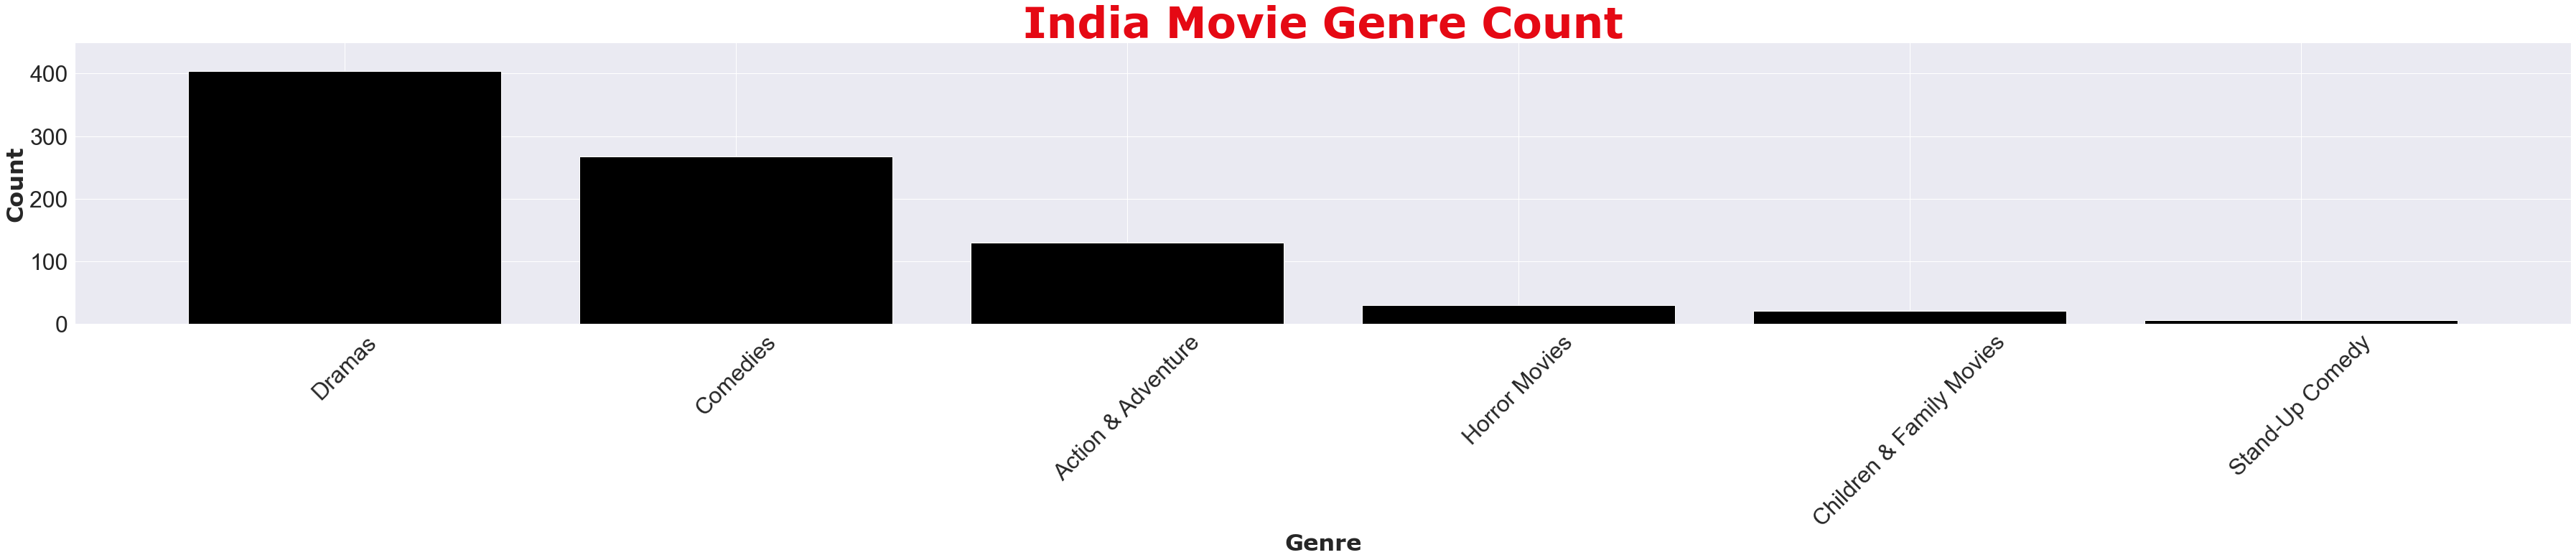

In [50]:
plt.figure(figsize=(50,11))
plt.bar(india_movies.genre, india_movies.counts, color="black")
plt.xticks(fontsize = 32, rotation = 45)
plt.yticks(fontsize = 32)
plt.xlabel("Genre",fontsize = 32,fontweight = "bold",fontname="Verdana")
plt.ylabel("Count",fontsize = 32,fontweight = "bold",fontname="Verdana")
plt.title("India Movie Genre Count", fontsize = 60, fontweight = "bold",fontname="Verdana", color = "#E50914")
plt.ylim(-1, 450)
plt.tight_layout()
plt.savefig("India Movie Genre Count.png")
plt.show()

#United Kingdom

In [53]:
uk_df = top_genre.loc[(top_genre["country"] == 'United Kingdom')]
uk_df.head()

,show_id,title,release_year,type,rating,country,genre,duration
13,s95,Show Dogs,2018,Movie,PG,United Kingdom,Children & Family Movies,90.0
19,s116,Bright Star,2009,Movie,PG,United Kingdom,Dramas,119.0
23,s123,In the Cut,2003,Movie,R,United Kingdom,Thrillers,118.0
40,s156,Labyrinth,1986,Movie,PG,United Kingdom,Action & Adventure,101.0
57,s178,The Guns of Navarone,1961,Movie,PG-13,United Kingdom,Action & Adventure,156.0


In [54]:
uk_df2 = uk_df.value_counts()
uk_df2

show_id  title                         release_year  type   rating  country         genre                     duration
s1034    Rush                          2013          Movie  R       United Kingdom  Action & Adventure        123.0       1
s6855    Ginger & Rosa                 2012          Movie  PG-13   United Kingdom  Dramas                    90.0        1
s6867    GoldenEye                     1995          Movie  PG-13   United Kingdom  Action & Adventure        130.0       1
s6925    Hard Tide                     2015          Movie  R       United Kingdom  Dramas                    79.0        1
s7005    Hot Property                  2016          Movie  R       United Kingdom  Comedies                  82.0        1
                                                                                                                         ..
s4320    Mowgli: Legend of the Jungle  2018          Movie  PG-13   United Kingdom  Action & Adventure        105.0       1
s4405    Outl

In [55]:
uk_df.genre.value_counts() 

Dramas                      96
Action & Adventure          52
Comedies                    39
Horror Movies               18
Children & Family Movies    17
Stand-Up Comedy             17
Thrillers                    6
Name: genre, dtype: int64

In [56]:
uk_movies = uk_df.genre.value_counts().reset_index()
uk_movies.columns = ["genre", "counts"]
uk_movies

,genre,counts
0,Dramas,96
1,Action & Adventure,52
2,Comedies,39
3,Horror Movies,18
4,Children & Family Movies,17
5,Stand-Up Comedy,17
6,Thrillers,6


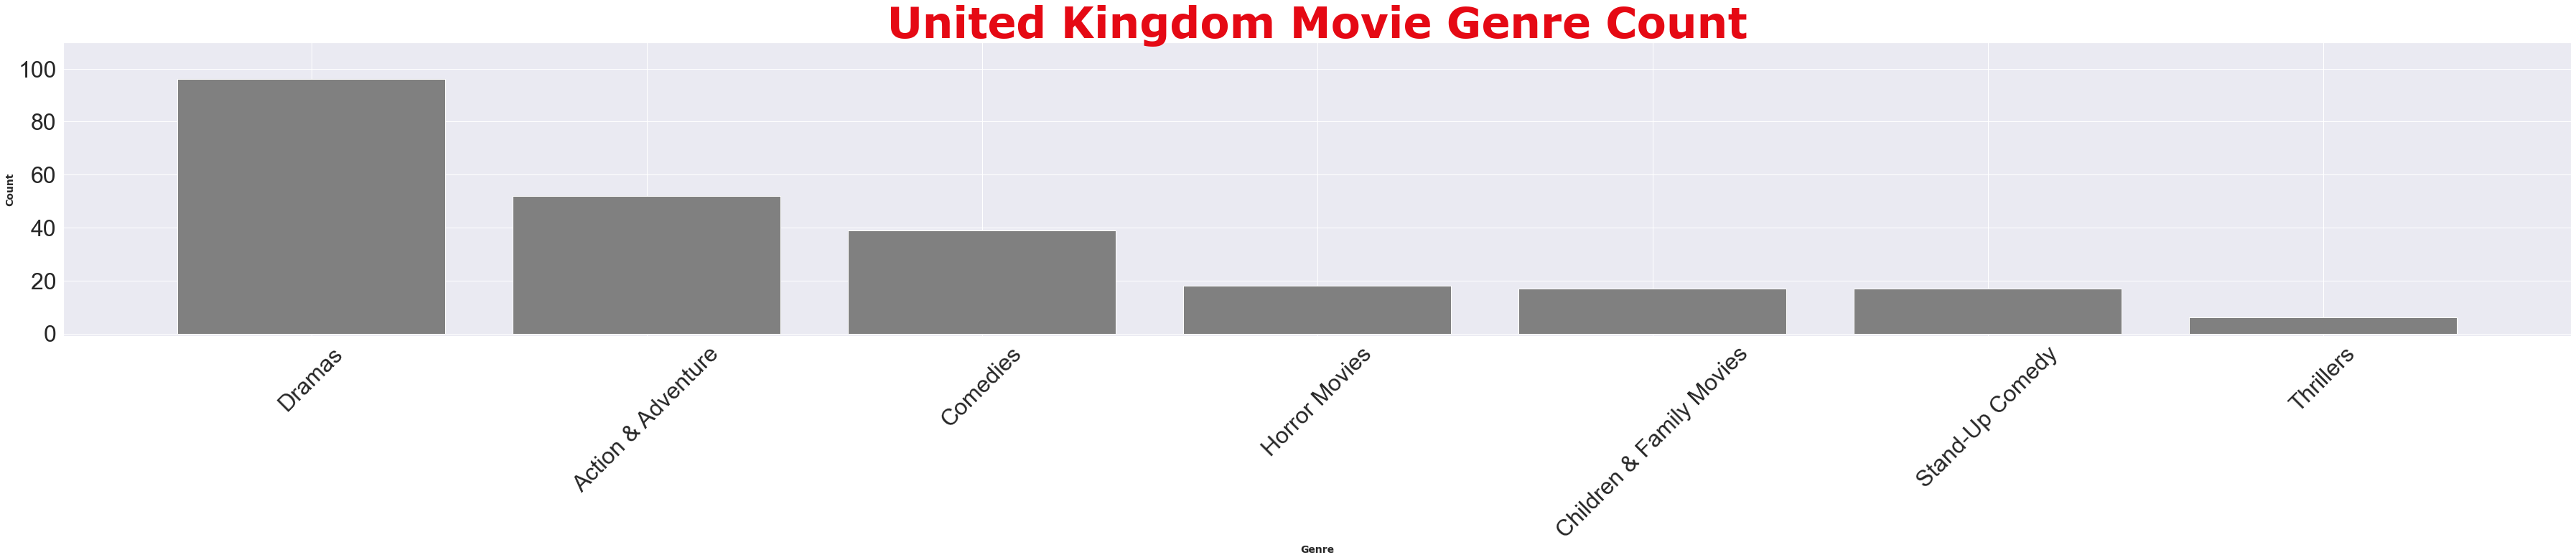

In [67]:
plt.figure(figsize=(50,11))
plt.bar(uk_movies.genre, uk_movies.counts, color="grey")
plt.xticks(fontsize = 32, rotation = 45)
plt.yticks(fontsize = 32)
plt.xlabel("Genre",fontsize = 14,fontweight = "bold",fontname="Verdana")
plt.ylabel("Count",fontsize = 14,fontweight = "bold",fontname="Verdana")
plt.title("United Kingdom Movie Genre Count", fontsize = 60, fontweight = "bold",fontname="Verdana", color = "#E50914")
plt.ylim(-1, 110)
plt.tight_layout()
plt.savefig("United Kingdom Movie Genre Count.png")
plt.show()


In [64]:
 # Labels for the sections of our pie chart
genre = ['dramas', 'comedies', 'documentaries', 'action & adventure', 'children & family movies', 'stand-up comedy',
         'horror movies']

# The values of each section of the pie chart
counts = [924, 678, 515, 503, 327, 231, 170]

# The colors of each section of the pie chart
colors = ["#E50914","#EC525A","#F49CA1","#E7212B","#FCE6E7"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05)

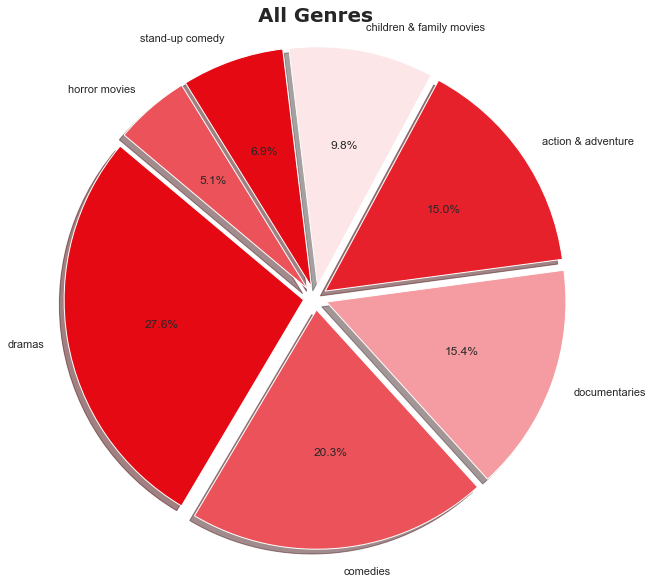

In [65]:
# Tell matplotlib to create a pie chart based upon the above data

plt.figure(figsize = (10,10))
plt.pie(counts, explode=explode, labels=genre, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.title("All Genres", fontweight = 'bold', fontname = "Verdana", fontsize=20)

plt.savefig("All Genres Pie.png")
# Save an image of our chart and print the final product to the screen
#plt.savefig("../Images/PyPies.png")
plt.show()

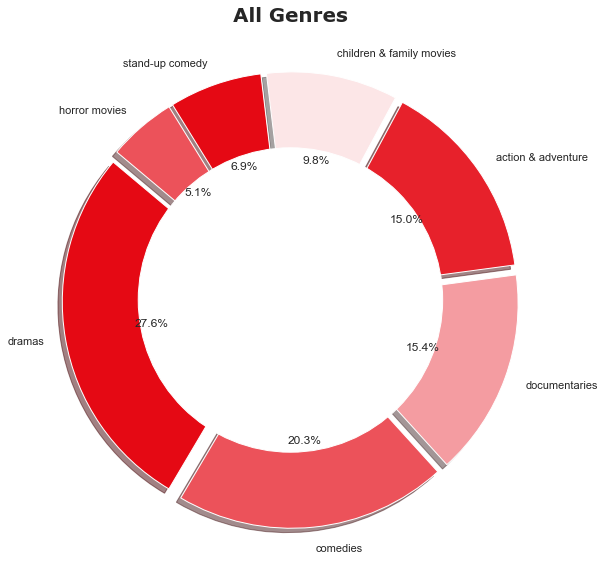

In [66]:
plt.figure(figsize = (10,10))
# create data

# Create a pieplot
plt.pie(counts, explode=explode, labels=genre, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("All Genres", fontweight = 'bold', fontname = "Verdana", fontsize=20)
# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0),0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.savefig("All Genres Donut.png")
plt.show()